<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/cuoikiaitrainlai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [5]:
trainset='/content/drive/MyDrive/baitapai/archive/flowers/'
     

In [6]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 6300 images belonging to 10 classes.
Found 700 images belonging to 10 classes.


In [7]:
validation_set.class_indices

{'bellflower': 0,
 'calendula': 1,
 'common_daisy': 2,
 'dandelion': 3,
 'iris': 4,
 'magnolia': 5,
 'rose': 6,
 'sunflower': 7,
 'tulip': 8,
 'water_lily': 9}

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
50/50 [==============================] - 1152s 23s/step - loss: 2.2784 - accuracy: 0.1881 - val_loss: 1.7927 - val_accuracy: 0.3214
Epoch 2/50
50/50 [==============================] - 41s 814ms/step - loss: 1.7889 - accuracy: 0.3267 - val_loss: 1.4982 - val_accuracy: 0.4271
Epoch 3/50
50/50 [==============================] - 41s 816ms/step - loss: 1.4110 - accuracy: 0.4835 - val_loss: 1.1378 - val_accuracy: 0.5886
Epoch 4/50
50/50 [==============================] - 41s 813ms/step - loss: 1.2171 - accuracy: 0.5648 - val_loss: 1.0190 - val_accuracy: 0.6343
Epoch 5/50
50/50 [==============================] - 41s 819ms/step - loss: 1.1045 - accuracy: 0.6133 - val_loss: 1.1002 - val_accuracy: 0.6186
Epoch 6/50
50/50 [==============================] - 40s 808ms/step - loss: 1.0514 - accuracy: 0.6268 - val_loss: 1.0085 - val_accuracy: 0.6443
Epoch 7/50
50/50 [==============================] - 41s 809ms/step - loss: 1.0110 - accuracy: 0.6510 - val_loss: 0.9124 - val_accuracy: 0.6714

In [27]:
model.save('content/drive/MyDrive/cuoikiai.h5')

In [36]:
model=load_model('cuoikiai.h5')

In [45]:
label = ['bellflower','calendula','common_daisy','dandelion','iris','magnolia','rose','sunflower','tulip','water_lily']

1/1 [==============================] - 1s 530ms/step
rose


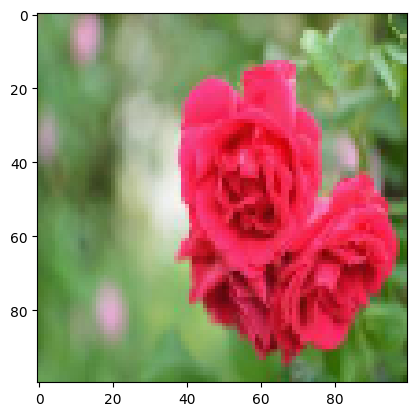

In [46]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive/flowers/rose/rose (10).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 20ms/step
sunflower


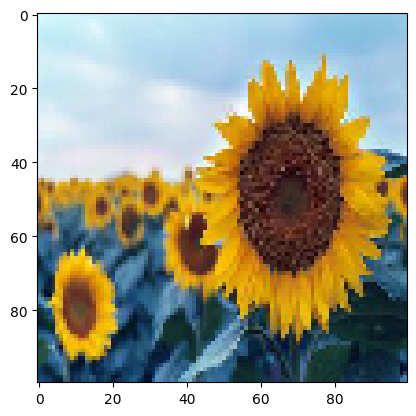

In [47]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive/flowers/sunflower/sunflower (20).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 18ms/step
tulip


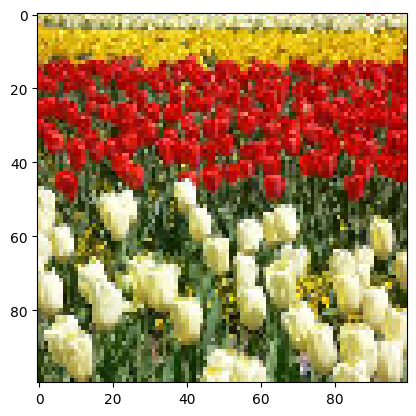

In [48]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive/flowers/tulip/tulip (30).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])